In [84]:
!pip3 freeze > requirements.txt

In [68]:
# !pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/33/ee/e87d7a79a32f5ac833655ef29ebd37c7b389e8957bc71aacb10a95f822b9/matplotlib-3.8.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8b/4f/be28a39cd5e988b8d3c2cc642c2c7ffeeb28fe80a86df71b6d1e473c5038/contourpy-1.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/c

In [69]:
import pandas as pd
import datetime as datetime
import numpy as np
import seaborn as sns

In [60]:
imdb = pd.read_parquet('../data/raw/imdb_reviews/cleaned_sorta.parquet')
imdb['scrape_date'] = [datetime.date(2023, 10, 21) for i in range(len(imdb))]
imdb['is_rotten'] = [np.nan for i in range(len(imdb))]
imdb['source'] = ['imdb' for i in range(len(imdb))]
imdb.score = imdb.score.apply(lambda x: x/10)




rt_aud = pd.read_csv('../data/raw/reviews/RT_audience.csv')
rt_aud['scrape_date'] = [datetime.date(2023, 10, 21) for i in range(len(rt_aud))]
rt_aud['title'] = [np.nan for i in range(len(rt_aud))]
rt_aud['is_rotten'] = [np.nan for i in range(len(rt_aud))]
rt_aud['source'] = ['rt_aud' for i in range(len(rt_aud))]




rt_crit = pd.read_csv('../data/raw/reviews/RT_critics.csv')
rt_crit['scrape_date'] = [datetime.date(2023, 10, 21) for i in range(len(rt_crit))]
rt_crit['title'] = [np.nan for i in range(len(rt_crit))]
rt_crit['score'] = [np.nan for i in range(len(rt_crit))]
rt_crit['source'] = ['rt_crit' for i in range(len(rt_crit))]





metacritic = pd.read_json('../data/raw/reviews/metacritic.json')
metacritic['title'] = [np.nan for i in range(len(metacritic))]
metacritic['is_rotten'] = [np.nan for i in range(len(metacritic))]
metacritic['source'] = ['metacritic' for i in range(len(metacritic))]



In [61]:
df_list = [imdb, rt_aud, rt_crit, metacritic]
for i in df_list:
    print(sorted(i.columns))

['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']
['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']
['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']
['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']


In [62]:
main_df = pd.concat(df_list)
print(len(main_df) - len(main_df.drop_duplicates()))
main_df = main_df.drop_duplicates()
main_df.loc[main_df['score'] == 0.0, ['score']]  = 1.0

265


In [63]:
main_df.score.value_counts()

score
10.0    119907
8.0      61449
9.0      43976
7.0      39072
6.0      31970
1.0      18446
5.0      17439
4.0      15751
2.0      11211
3.0       9614
Name: count, dtype: int64

In [64]:
main_df.movie.value_counts()

movie
avengers-endgame                               21428
captain-marvel                                 19978
doctor-strange-in-the-multiverse-of-madness    15105
thor-love-and-thunder                          15085
eternals                                       14828
black-panther                                  14043
black-widow                                    12867
guardians-of-the-galaxy                        12538
iron-man-3                                     12345
captain-america-civil-war                      12313
iron-man                                       12106
black-panther-wakanda-forever                  11985
avengers-age-of-ultron                         11897
captain-america-the-first-avenger              11671
iron-man-2                                     11567
captain-america-the-winter-soldier             11494
thor                                           11347
the-incredible-hulk                            11210
spider-man-far-from-home                

In [76]:
scores = []
for film in set(main_df.movie):
    new_df = main_df.query('movie == @film')
    scores.append([film, new_df.score.median(), new_df.score.mean()])
    print('median score:', new_df.score.median())
    print('mean score:', new_df.score.mean())

median score: 6.0
mean score: 5.443507472919237
median score: 7.0
mean score: 6.743388834476004
median score: 7.0
mean score: 7.100173341848372
median score: 9.0
mean score: 8.16563846868926
median score: 9.0
mean score: 7.865174129353234
median score: 7.0
mean score: 7.103537378597523
median score: 8.0
mean score: 7.248410535876476
median score: 8.0
mean score: 6.961400065423618
median score: 10.0
mean score: 8.948364554013395
median score: 9.0
mean score: 7.772951728307971
median score: 7.0
mean score: 6.363060869565217
median score: 7.0
mean score: 6.947069597069597
median score: 10.0
mean score: 8.668370858322682
median score: 9.0
mean score: 7.973209249858996
median score: 9.0
mean score: 7.854945054945055
median score: 10.0
mean score: 8.638226213864721
median score: 9.0
mean score: 8.655795148247979
median score: 8.0
mean score: 7.047311827956989
median score: 9.0
mean score: 8.251803388693173
median score: 6.0
mean score: 5.772693173293323
median score: 9.0
mean score: 8.57
med

In [80]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_37113/2165002354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores.Mean_score, bins=20)


<Axes: xlabel='Mean_score', ylabel='Density'>

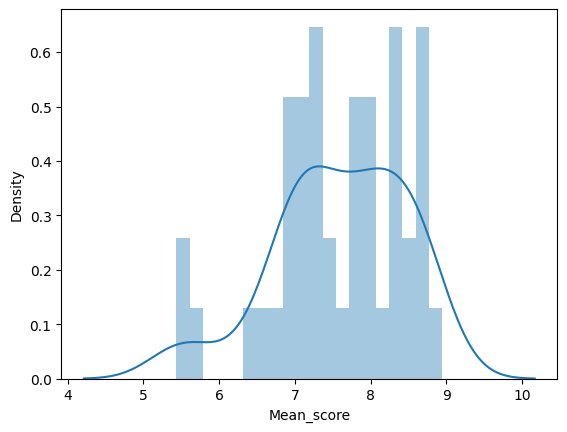

In [83]:
scores = pd.DataFrame(data=scores, columns=['Movie', 'Median_Score', 'Mean_score'])
sns.distplot(scores.Mean_score, bins=20)